## BACKTESTING STRATEGIES

## 1. DCA simple (frecuencia semanal y mensual)

## Conclusiones

* No existe diferencia significativa en el retorno entre los días de la semana.
* Se obtiene un mayor retorno realizando compras mensuales, de aproximadamente 8 puntos porcentuales
* El mejor día del mes es el 24 para el período de 2021, para el histórico total es el día 15.

In [177]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime, date, timedelta
import math
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import statistics as s

import seaborn as sns
sns.set()
sns.set_theme()

In [178]:
# Lectura de datos
start = datetime(1900,1,1)
end = datetime.now()
data = pdr.get_data_yahoo('BTC-USD', start, end, interval='d')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-11-17,60823.609375,58515.410156,60139.621094,60368.011719,3.917839e+10,60368.011719
2021-11-18,60948.500000,56550.792969,60360.136719,56942.136719,4.138834e+10,56942.136719
2021-11-19,58351.113281,55705.179688,56896.128906,58119.578125,3.870241e+10,58119.578125


In [179]:
def cagr(df):
    """
    cagr [retorna el CAGR en un DataFrame]
    [Una tasa de crecimiento anual compuesto (CAGR) mide la tasa de retorno de una inversión (como un fondo de inversión o un bono) durante un período de inversión, como 5 o 10 años]
    Args:
        df ([DataFrame]): [DataFrame obtenido al leer los datos del activo de interés]
    """
    df = df.copy()
    df = df.sort_index(ascending=True)
    df['cum_return'] = (1 + df['btc_return']).cumprod()
    total_ret = df['cum_return'][-1]

    start = datetime.utcfromtimestamp(df.index.values[0].astype('O')/1e9)
    end = datetime.utcfromtimestamp(df.index.values[-1].astype('O')/1e9)
    period_years = (end - start).days / 365.25
    CAGR = (total_ret)**(1/period_years)-1
    return CAGR

In [180]:
# Crear variables y subset para análisis
df = data[['Adj Close']]['2016':'2021'].copy()
df = df.rename(columns={'Adj Close': 'btc_price'})
df['btc_return'] = df['btc_price'].pct_change()
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df

,btc_price,btc_return,day,weekday,month,year
Date,,,,,,
2016-01-01,434.334015,NaN,1,4,1,2016
2016-01-02,433.437988,-0.002063,2,5,1,2016
2016-01-03,430.010986,-0.007907,3,6,1,2016
2016-01-04,433.091003,0.007163,4,0,1,2016
2016-01-05,431.959991,-0.002611,5,1,1,2016
...,...,...,...,...,...,...
2021-11-17,60368.011719,0.003437,17,2,11,2021
2021-11-18,56942.136719,-0.056750,18,3,11,2021
2021-11-19,58119.578125,0.020678,19,4,11,2021


In [181]:
print(data['Adj Close'][-1])
print(s.harmonic_mean(df['btc_price']))
cagr(df)

58012.16015625
2107.9299881664456


1.2950142947475811

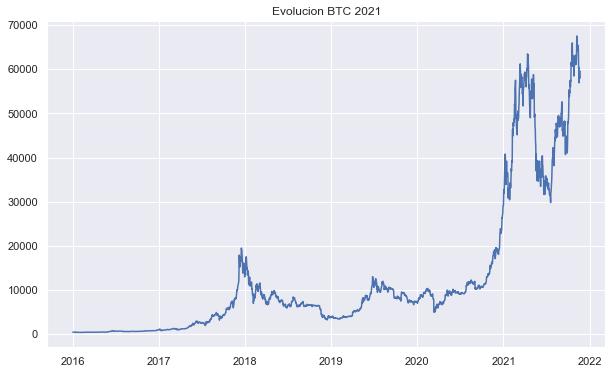

In [182]:
# Evolución BTC
plt.figure(figsize=(10,6))
plt.plot(df.index, df['btc_price'])
plt.title('Evolucion BTC 2021')
plt.grid(True)

## Weekly frequency

In [183]:
usdt = 50
initial_usdt = []
final_usdt = []
usdt_return = []
dca_r = []
cagr_value = []


for i in range(7):
    df_sem = df[df['weekday']==i]
    df_sem['btc_return'] = df_sem['btc_price'].pct_change()
    df_sem['usdt_invested'] = usdt
    df_sem['btc_amount'] = df_sem['usdt_invested']/df_sem['btc_price']
    
  
    #metrics
    total_btc_amount = df_sem['btc_amount'].sum()
    
    total_usdt_invested = df_sem['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*df['btc_price'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

    dca_return = (df['btc_price'][-1]/s.harmonic_mean(df_sem['btc_price'])-1)*100
    dca_r.append(round(dca_return,2))

    btc_cagr = cagr(df_sem)
    cagr_value.append(round(btc_cagr,2))

    

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
dca_r  = pd.DataFrame(dca_r, columns=['dca_return'])
cagr_value = pd.DataFrame(cagr_value, columns=['cagr'])

resultados_sem = pd.concat([initial_usdt, final_usdt, usdt_return, dca_r, cagr_value], axis=1)
resultados_sem

    

,total_usdt_invested,total_usdt_obtained,total_return,dca_return,cagr
0,15350,421365.8,2645.05,2645.05,1.30
1,15300,420995.1,2651.60,2651.60,1.32
2,15350,420458.7,2639.14,2639.14,1.32
3,15350,419331.8,2631.80,2631.80,1.28
4,15300,425828.7,2683.19,2683.19,1.30
5,15400,424252.0,2654.88,2654.88,1.31
6,15350,423514.1,2659.05,2659.05,1.36


In [184]:
best_day = resultados_sem['cagr'].idxmax()
max_weekly_return = resultados_sem['dca_return'].max()
cagr_sem_max = resultados_sem['cagr'].max()


## Monthly frequency

In [185]:
usdt = 200
initial_usdt = []
final_usdt = []
usdt_return = []
cagr_value = []
plt.figure(figsize=(20,10))


for i in range(31):
    df_mes = df[df['day']==i+1]
    df_mes['btc_return'] = df_mes['btc_price'].pct_change()
    df_mes['usdt_invested'] = usdt
    df_mes['btc_amount'] = df_mes['usdt_invested']/df_mes['btc_price']

    #metrics
    total_btc_amount = df_mes['btc_amount'].sum()
    
    total_usdt_invested = df_mes['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

    btc_cagr = cagr(df_mes)
    cagr_value.append(round(btc_cagr,2))



initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
cagr_value = pd.DataFrame(cagr_value, columns=['cagr'])

resultados_mes = pd.concat([initial_usdt, final_usdt, usdt_return, cagr_value], axis=1)
resultados_mes


,total_usdt_invested,total_usdt_obtained,total_return,cagr
0,14200,398974.1,2709.68,1.33
1,14200,398425.7,2705.81,1.35
2,14200,397028.7,2695.98,1.35
3,14200,393512.2,2671.21,1.34
4,14200,395432.7,2684.74,1.34
5,14200,393872.5,2673.75,1.34
6,14200,392705.8,2665.53,1.33
7,14200,391718.6,2658.58,1.36
8,14000,391578.5,2696.99,1.36
9,14200,393980.1,2674.51,1.35


<Figure size 1440x720 with 0 Axes>

día máximo: 0
retorno máximo: 2709.68


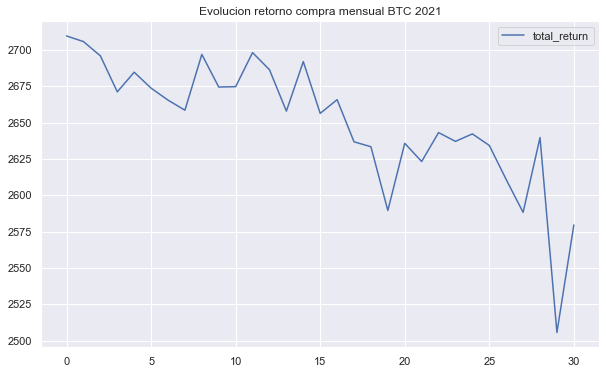

In [186]:
plt.figure(figsize=(10,6))
plt.title('Evolucion retorno compra mensual BTC 2021')
plt.plot(resultados_mes.index, resultados_mes['total_return'], label='total_return')
plt.legend()
dia_maximo = resultados_mes['total_return'].idxmax()
retorno_maximo = resultados_mes['total_return'].max()
cagr_mes_max = resultados_mes['cagr'].max()
print(f'día máximo: {dia_maximo}')
print(f'retorno máximo: {retorno_maximo}')

In [187]:
results = pd.DataFrame({'cagr': [cagr_sem_max, cagr_mes_max], 'return': [max_weekly_return, retorno_maximo ] , 'Best_day': [best_day, dia_maximo]}, index=['weekly_freq', 'Montly_freq'])
results

,cagr,return,Best_day
weekly_freq,1.36,2683.19,6
Montly_freq,1.43,2709.68,0
